In [1]:
import sys
import os
# Adjust the path to point to your src directory
sys.path.insert(0, os.path.abspath('../../src'))

from icpoes.analyser import ConcentrationAnalyser
from icpoes.check_stds import check_standards

sukinda = '../../data/raw_data/sukinda09Jan25.csv'
deccan_soils = '../../data/raw_data/deccan_soils13Jan25.csv'
soils = '../../data/raw_data/soils_sukinda_diluted10Mar25.csv'

file_paths = [sukinda, deccan_soils, soils]
file_names = ['../../data/sukinda.nc', '../../data/deccan_soils.nc', '../../data/soils.nc']

In [2]:
certified_values = check_standards()
for file_path, file_name in zip(file_paths, file_names):
    analyser = ConcentrationAnalyser.from_csv(file_path)
    analyser.drop_extraneous_vars()\
        .compute_calibration_stats(['SLRS-6', 'SPS-SW2 10%', 'NIST 1640a'])\
        .compute_error_estimates(certified_values)\
        .get_results()\
        .aggregate_by_element()\
        .save_data(file_name)

Results saved to ../../data/sukinda.nc
Warning for SLRS-6: The following species have missing values in the calibration subset: ['K 766.491 R' 'Mg 280.270 Ax']
Warning for SPS-SW2 10%: The following species have missing values in the calibration subset: ['K 766.491 R' 'Mg 280.270 Ax']
Results saved to ../../data/deccan_soils.nc
Results saved to ../../data/soils.nc


/Users/angus/miniconda3/envs/topepan/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/angus/miniconda3/envs/topepan/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


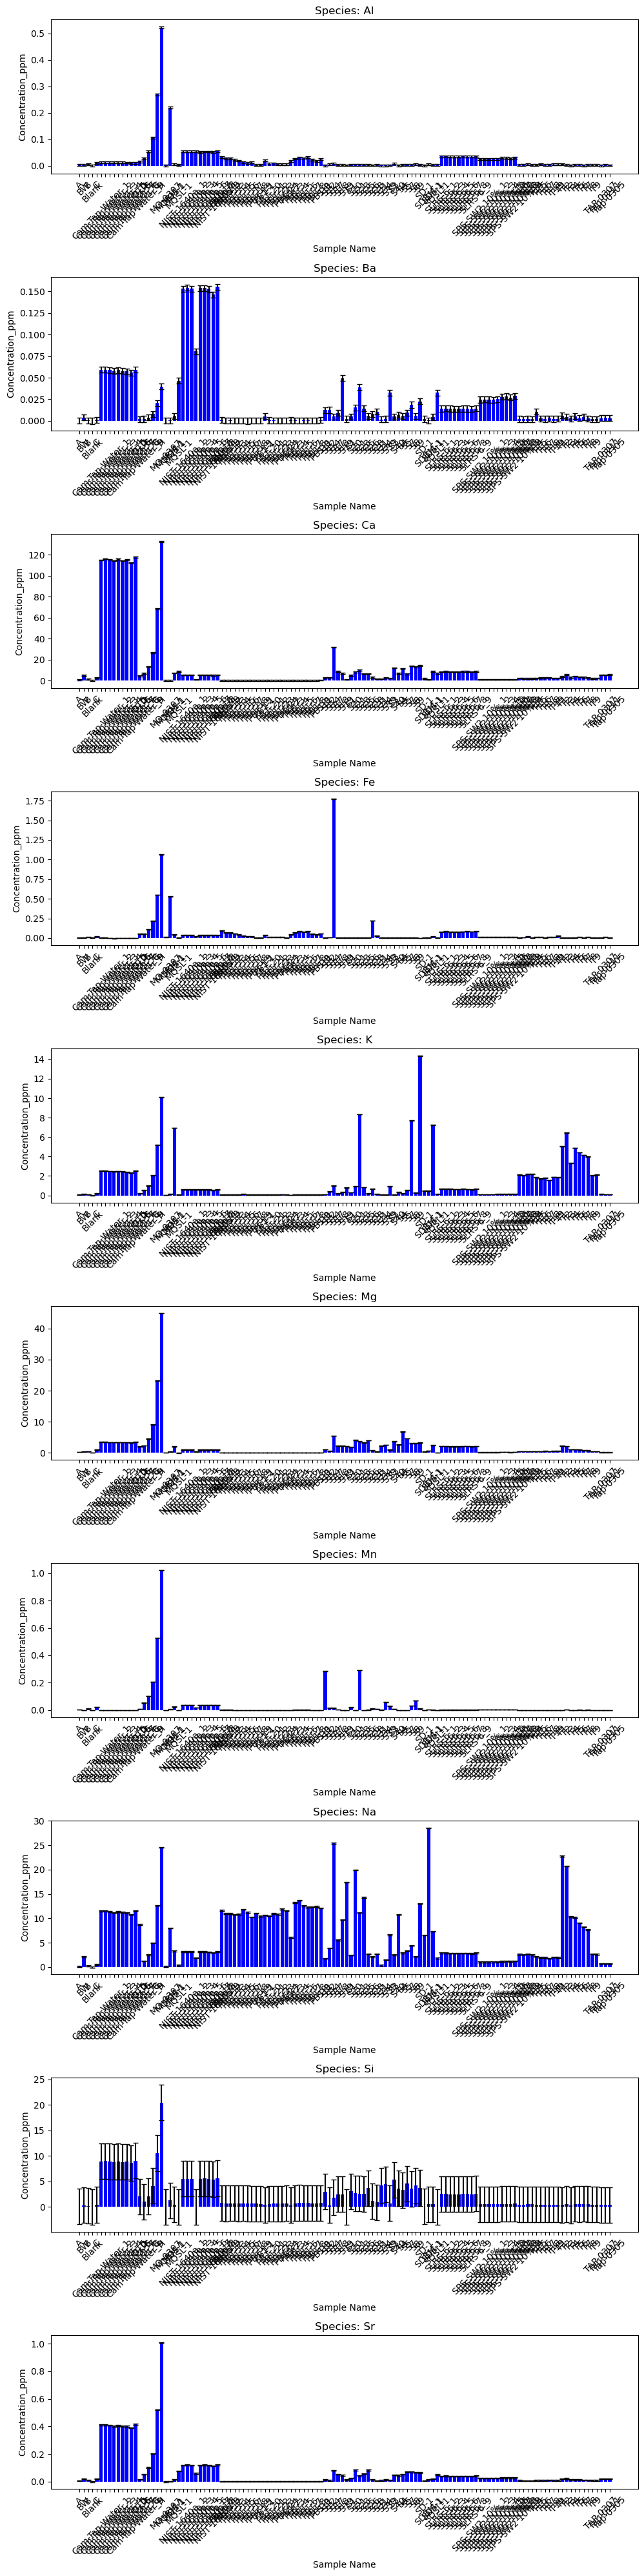

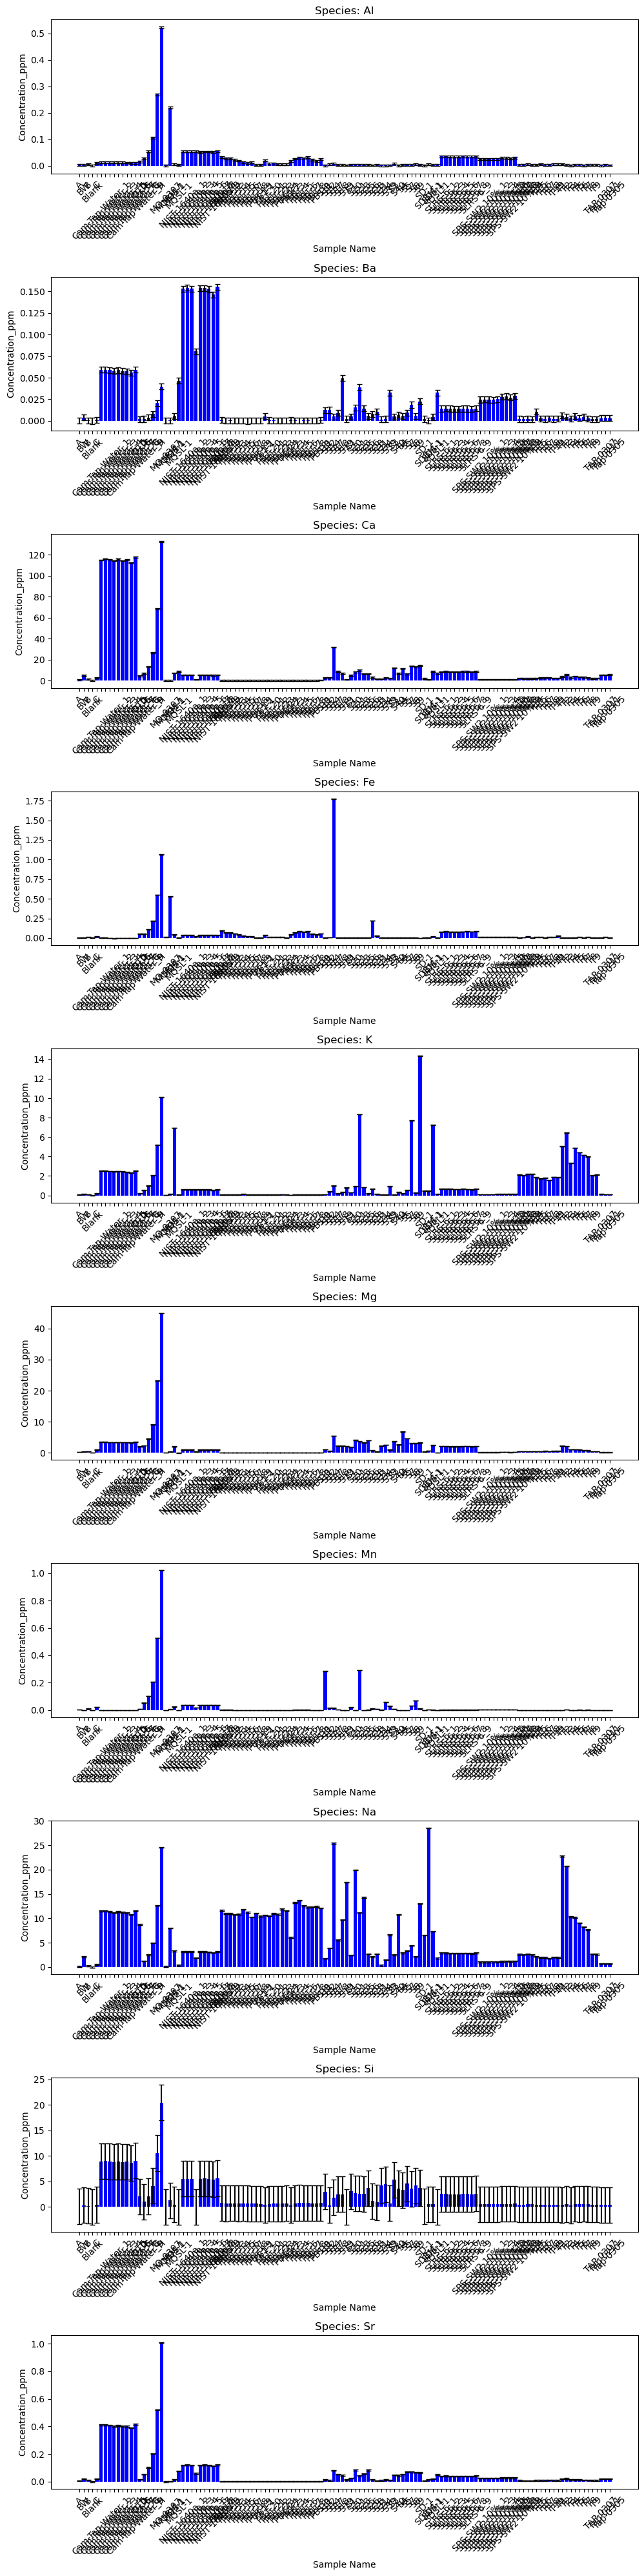

In [3]:
from icpoes.visualisation import bar_by_sample, bar_by_species

bar_by_species(analyser.results['aggregated'])